# Graph Theory Questions for Jupyter-based Exam

## Instructions
1. You may use any source of information you can find, so long as you don't communicate with anyone else.
2. You can put your answers in the marked cells. If you prefer making multiple answer cells that's also ok, but make sure I know which question you're answering where.
3. You can split up code answers into multiple cells if you like, but keep them in order for me to grade!
3. You get partial points for partial answers. This means you can still get points for coding questions if you explain your reasoning, but don't manage the code itself.
4. You have 90 minutes total for the exam (unless you are eligible for "Special Facilities"), distribute it wisely amongst questions.
5. Remember you can look up the documentation of any function or object by appending "?" (question mark) to it without calling it with "()"; this is the same documentation as you'd look up on the internet! See an example in the next cell.
4. Unless specified otherwise you may assume graphs are simple and undirected.
6. Your final grade will be `score / 70 * 9 + 1`


In [1]:
nx.Graph?

Object `nx.Graph` not found.


# -- BEGIN EXAM --
Good luck!
*Don't forget to run the global imports defined in the next cell!!!*

In [2]:
# Global definitions you will need are here; RUN THIS CELL
# Define any extra global modules you want to add yourself here as well!
# As well as any extra helper functions you want to use in all exercises below.
import networkx as nx
import scipy.linalg
import random
import numpy as np
from scipy.cluster import vq
import matplotlib.pyplot as plt
%matplotlib inline


## Question 1 (10pt)

Answer the following questions.

1. What is the definition of the chromatic number of a graph? Give a non-trivial[1] example.
1. What is the definition of a bipartite graph? Give a non-trivial[1] example.
1. What is the chromatic number of a bipartite graph?
1. What is the chromatic number of a $K_n$ complete graph?
1. What is the chromatic number of a cycle graph of size $n$?
1. What is the chromatic number of a graph containing a clique of size $n$?
1. Explain in your own words what the following means. What is X?
   > Sets $A_1, A_2, ..., A_n$ are called X if and only if $A_i \cap A_j = \emptyset \forall i \neq j$

[1] For example, the chromatic number of a graph without any edges is too simple.

In [3]:
# 1- The smallest number of colors needed to color a graph G is called its chromatic number, and is often denoted χ(G). 
# an example can be a complete graph with three nodes tha needs THREE different colors for each node as all of them are connected together.
# 2- a graph whose vertices can be divided into two disjoint and independent sets and , that is every edge connects a vertex in to one in .
# a non-trivial example can be a group of people for example adult men as a group of node and a group are sport clubsas another group of
# node. membership of adult men in this clubs can be consider as the edges. there is no edges between the nodes of each group
# 3- the chromatic number of a bipartite graph is equal to TWO, since the two parts are each independent sets and can be colored with a
# single color.
# 4- because all the nodes in a complet graph are connected to each other we need as color as the number of the node is. for example
# if k=5, that means a complete graph of grade 5. we need 5 colors
# 5- chromatic number of a cycle graph is equal to THREE if we have odd number of nodes otherwise we need TWO colors
# 6- a clique is a complete graph, so the number of colors to seperated the nodes in the clique from each other should be equal
# to the number of nodes in the clique. consequently, the graph contain a clique should at least contain n different colors.
# 7- x is connected components of a graph. each An is a connected component of the main graph.


## Question 2 (20pt)

Some proteins can adopt multiple conformations and transition between these conformations. You can describe these kind of systems using directed graphs. Nodes will be the conformations, and edges the transitions between these conformations. Some of these conformations will be more stable than others, and transitions between these conformations will not be arbitrary. For example, a transition from an alpha-helical conformation to a coil conformation will be more likely than a transition from an alpha-helical conformation directly to a beta-sheet conformation. These transition probablities can be expressed as floating point numbers between 0 and 1, where this probability expresses the proportion of protein that undergoes that transition in a time step. 

Given the following system, consider the following example (You can find the networkx digraph in the following cell).

| Transition | Probability |
|------------|-------------|
| A -> A     | 0.49        |
| A -> B     | 0.01        |
| A -> C     | 0.5         |
| B -> A     | 0.01        |
| B -> B     | 0.3         |
| B -> C     | 0.69        |
| C -> A     | 0.65        |
| C -> B     | 0.3         |
| C -> C     | 0.05        |


| Time || A | B | C |
|------||---|---|---|
|0||0.30|0.40|0.30|
|1||0.35|0.21|0.44|
|2||0.46|0.20|0.34|
|3||0.45|0.17|0.38|
|4||0.47|0.17|0.36|
|5||0.47|0.16|0.37|
|6||0.47|0.16|0.36|
|7||0.47|0.16|0.37|

At $t=0$ 0.3 of the population is A, 0.4 is B, and 0.3 is C. Each time step 50% of A, 69% of B, and 5% of C is transformed to C. So, at $t=1$ C has become $0.5*0.3 + 0.69*0.4 + 0.05*0.3 = 0.441$. What you can see is that after about 4 steps a stable state is reached, where 0.47 of the population is A, 0.16 is B, and 0.37 is C, and this distribution does not change any more.

An interesting question you can ask for these kind of systems is what the distribution is between the separate conformations after an inifinite amount of time.

For all the following questions you can calculate the answer by hand, code up an universal solution, or even determine the answer with just reasoning. Explain your answer in all cases though!

Hint: If you choose to calculate a stable state you may assume the stable state will be reached after 100 steps.

1. Given a transition digraph with two nodes and edge weights of A->B=0.3 and B->A=0.7, what is the stable state after $\infty$ time?
2. You're given a digraph G containing a node $v_0$. $v_0$ has an out-degree of 0 and an in-degree of 1. In addition, the induced subgraph $G \setminus v_0$ (G with node $v_0$ removed) is strongly connected. What is the stable state after $\infty$ time? Why is it important to mention $G \setminus v_0$ is strongly connected?
3. The sum of the weighted out-degree of nodes in a transition digraphs should be normalized to 1. Why?
4. Load the digraph from the file `transition_graph.edgelist` (which is in edge list format: the first two columns are node indices, the third column is the transition probability), and determine the stable state. 

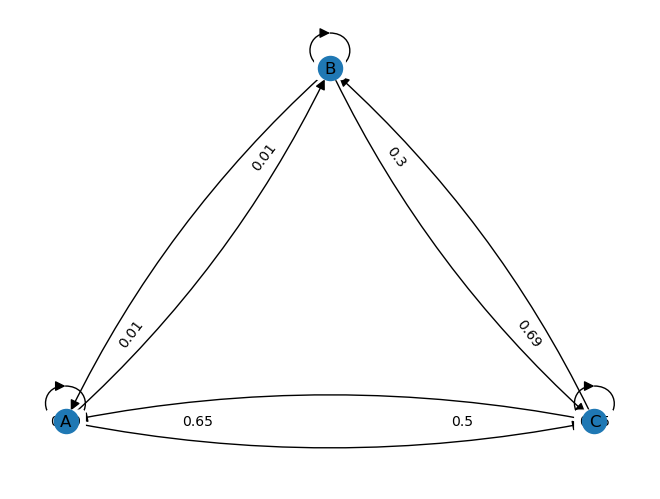

In [4]:
# Here's the digraph from the example.
transition_graph = nx.DiGraph()
transition_graph.add_edges_from([
    ('A', 'A', {'weight': 0.49}),
    ('A', 'B', {'weight': 0.01}),
    ('A', 'C', {'weight': 0.5}),
    ('B', 'A', {'weight': 0.01}),
    ('B', 'B', {'weight': 0.3}),
    ('B', 'C', {'weight': 0.69}),
    ('C', 'A', {'weight': 0.65}),
    ('C', 'B', {'weight': 0.3}),
    ('C', 'C', {'weight': 0.05}),
])
layout = {'A': (0, 0), 'B': (0.5, 1), 'C': (1, 0)}
weights = nx.get_edge_attributes(transition_graph, 'weight')
nx.draw(transition_graph, pos=layout, with_labels=True, connectionstyle='arc3,rad=0.1', arrowsize=15)
nx.draw_networkx_edge_labels(transition_graph, 
                             pos=layout, 
                             edge_labels=weights,
                             verticalalignment='center',
                             label_pos=0.25);

In [5]:
# 1- for this question I would use programming. First, I make my graph and its Adjacency matrix

graph = nx.DiGraph()
graph.add_edges_from([
    ('A', 'A', {'weight': 0.7}),
    ('A', 'B', {'weight': 0.3}),
    ('B', 'A', {'weight': 0.7}),
    ('B', 'B', {'weight': 0.3}),
    ])

# make the adjacency matrix
a = nx.to_numpy_array(transition_graph)
a1 = a
a2 = np.zeros((2,2))

# one way is to loop over this multiplication 
for counter in range(1, 20, 1): 
    a2 = a1 @ a1 
    #print(a2)
    #a = a1
    a1 = a2 
print(a2)


# another way is to use internal networkX function
b = nx.pagerank(transition_graph, alpha=1)
print(b)

[[0.47003284 0.16369048 0.36627668]
 [0.47003284 0.16369048 0.36627668]
 [0.47003284 0.16369048 0.36627668]]
{'A': 0.47003315142657986, 'B': 0.16369065239427763, 'C': 0.36627619617914253}


In [6]:
# using eigen value and eigenvectors to calculate stationary satate

from scipy.sparse import csgraph
a = nx.to_numpy_array(transition_graph)
#print(a)
norm_La = csgraph.laplacian(a, normed=True)
#print(norm_La)

vals, vecs = np.linalg.eig(norm_La)
order = np.argsort(vals)
#print(vecs)

vals = vals[order]
vecs = vecs[:, order]
vecs *= np.sign(vecs[0, 0]) 
#print(vecs)
stationary_state = vecs[:, 0]**2
print(stationary_state)

[0.1302922  0.49489504 0.37481276]


In [7]:
# 2- the strongly connected feature is important because it means we can reach to any state from other stats in that graph.add_edge
# so, in infinite run for this Markov Chain, whether we want or not we reach to the state v0 and from there we cannot go to any other state 
# so the final state in this specific Markov Chain is v0. This type of Markove Chain is called reducible Markove Chain. and for a Markove chain
# to convverge to a stationary state, it is important to be IRREDUCIBLE.  

In [8]:
# 3-  this is a very important feature of any Markove Chains because when we normalize the ongoing transitions of a node we change the weights 
# into ratios or percentage. Also, any future states are dependent only on the current state, so we should know all the possibilities for the future
# state only from current state. Consequently, all the possible transitions should be present in the current state which makes the sum of these 
# transitions equal to one or 100 percent. If it is not eaqual to one or 100% it means that the future state is dependent not only on the current
# state but also on another state from the past to make all the possible paths to future state equal to one, which is not the definition of a Markov
# Chain.   

DiGraph with 10 nodes and 49 edges
[0.07807315 0.10970248 0.07950687 0.0804656  0.16671897 0.10346622
 0.12536537 0.08490404 0.11082214 0.06097516]
{0: 0.07807399041164359, 1: 0.10970318686493986, 5: 0.07950687520833284, 7: 0.08046649180621723, 8: 0.1667181249306241, 2: 0.10346616792858701, 3: 0.12536548541089557, 9: 0.08490383290509428, 6: 0.11082046900141046, 4: 0.060975375532255564}


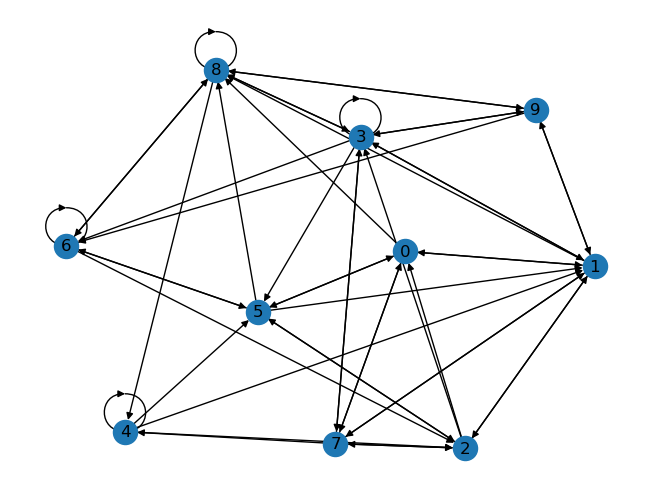

In [9]:
# 4- first I read the file and then use the above functions
graph.clear()
graph = nx.read_edgelist('transition_graph.edgelist', create_using=nx.DiGraph, nodetype=int, data=(("weight", float),))
print(graph)

# make the adjacency matrix
a = nx.to_numpy_array(graph)
a1 = a
a2 = np.zeros((2,2))

# one way is to loop over this multiplication 
for counter in range(1, 20, 1): 
    a2 = a1 @ a1 
    #print(a2)
    #a = a1
    a1 = a2 
print(a2[0])


b = nx.pagerank(graph, alpha=1)
print(b)
nx.draw_spring(graph, with_labels=True)

In [10]:
# using eigen value and eigenvectors to calculate stationary satate

from scipy.sparse import csgraph
a = nx.to_numpy_array(graph)
#print(a)
norm_La = csgraph.laplacian(a, normed=True)
#print(norm_La)

vals, vecs = np.linalg.eig(norm_La)
order = np.argsort(vals)
#print(vecs)

vals = vals[order]
vecs = vecs[:, order]
vecs *= np.sign(vecs[0, 0]) 
#print(vecs)
stationary_state = vecs[:, 0]**2
print(stationary_state)

[0.1195289 +0.j 0.09383439+0.j 0.09138043+0.j 0.16402093+0.j
 0.07254323+0.j 0.09796455+0.j 0.07784934+0.j 0.1095498 +0.j
 0.04791115+0.j 0.12541727+0.j]


## Question 3 (20 pt)

A sports club had an internal dispute, and is split into two. People who are friends joined the same, new, club. For all the members of both clubs researchers tracked how often they interact outside of the sports club.

1. Load in the graph in the file `karate_club.graphml`. If you don't manage to read in this file, use the following snippet of code: `graph = nx.karate_club_graph()` (doing this means you will get 0 points for this subquestion). This graph is annotated in two ways: each node has a `"club"` attribute describing which new club they joined (either 'Officer' or 'Mr. Hi'); additionally, each edge has a `"weight"` attribute, describing how often two people interact outside of the club. 
2. Assume the teachers of the new clubs are the most social/central. Identify the two new teachers. Which method(s) did you use, and why? If you don't manage, continue with nodes 4 and 24 as teachers to gain 0 points on this subquestion.
3. For both teachers, calculate the average distance between the teacher and their students, and between the teacher and members of the other club. Does this match your expectations? Plot the distances between teachers and students as 4 histograms.
4. Some members had difficulties choosing which club to join. Who?

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
[('0', {'club': 'Mr. Hi'}), ('1', {'club': 'Mr. Hi'}), ('2', {'club': 'Mr. Hi'}), ('3', {'club': 'Mr. Hi'}), ('4', {'club': 'Mr. Hi'}), ('5', {'club': 'Mr. Hi'}), ('6', {'club': 'Mr. Hi'}), ('7', {'club': 'Mr. Hi'}), ('8', {'club': 'Mr. Hi'}), ('9', {'club': 'Officer'}), ('10', {'club': 'Mr. Hi'}), ('11', {'club': 'Mr. Hi'}), ('12', {'club': 'Mr. Hi'}), ('13', {'club': 'Mr. Hi'}), ('14', {'club': 'Officer'}), ('15', {'club': 'Officer'}), ('16', {'club': 'Mr. Hi'}), ('17', {'club': 'Mr. Hi'}), ('18', {'club': 'Officer'}), ('19', {'club': 'Mr. Hi'}), ('20', {'club': 'Officer'}), ('21', {'club': 'Mr. Hi'}), ('22', {'club': 'Officer'}), ('23', {'club': 'Officer'}), ('24', {'club': 'Officer'}), ('25', {'club': 'Officer'}), ('26', {'club': 'Officer'}), ('27', {'club': 'Officer'}), ('28', {'club': 'Officer'}), ('29', {'club': 'Officer'}), ('30', {'club': 'Officer'}), ('31', {'club': 'Officer'}), ('32', {'club': 'Officer'}), ('33',

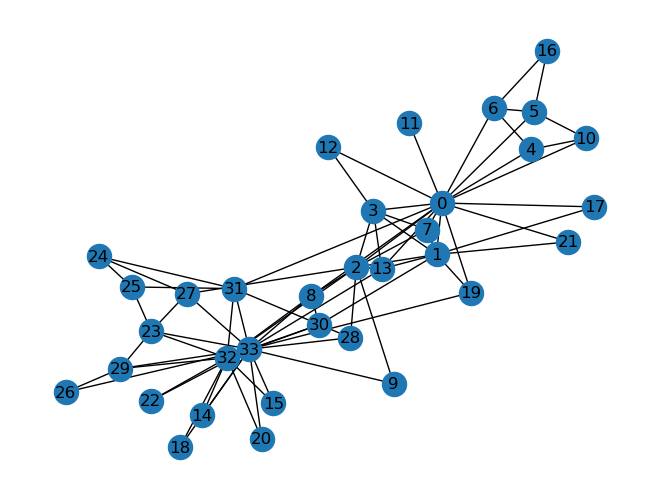

In [11]:
# 1- I will use the nx.read_graphml for this question
graph.clear()
graph = nx.read_graphml('karate_club.graphml')
print(graph)
print(graph.nodes(data=True))
print(graph.edges(data=True))

nx.draw_spring(graph, with_labels=True)

In [ ]:
# This part I will use a partitioning technique to seperate this graph into two partitions
def eig(arr):
    vals, vecs = np.linalg.eig(arr)
    # Sort eigenvectors and values by eigenvalues
    order = np.argsort(vals)
    vals = vals[order]
    vecs = vecs[:, order]
    if vecs[0, 0] < 0:
        # This is not strictly needed, but makes comparing the different Laplacians easier
        vecs *= -1
    return vals.real, vecs.real


# making Laplacian and Adajency matrix
A = nx.to_numpy_array(graph)
diag = A.sum(axis=1)

L = np.diag(diag) - A
# Don't do np.diag(diag) ** -0.5, since that turns all off-diagonals (0) to inf
L_sym = np.diag(diag**-0.5) @ L @ np.diag(diag**-0.5)
L_rw = np.diag(1/diag) @ L


#making eigenvectors and values for any form of Laplacian
vals, vecs = eig(L)
vals_sym, vecs_sym = eig(L_sym)
vals_rw, vecs_rw = eig(L_rw)
print(vals, vecs[0])
print(vals_sym)
print(vals_rw)
#plt.scatter(range(len(vals_rw)), vals_rw)
plt.scatter(range(len(vals_sym)), vals_sym)

# dividing the graph into different communities
k = 2
obs = vecs_sym[:, 1:1+k]
obs = obs/np.sqrt(np.sum(obs**2, axis=1, keepdims=True))
centroids, dist = vq.kmeans(obs, k, iter=1000)
labels, dist = vq.vq(obs, centroids)
print(labels)
plt.figure(3,figsize=(20,20))
nx.draw_networkx(graph, node_color=labels)
plt.show()

In [ ]:
# If we suppose that the two teachers are those who have more connection and meet other people more often,
# we can find two with the most edge weight or even use one internal function for centrality such as betweenness centrality or degree centrality
node_weghts_dict = {}

# first find the sum of the each node weights
for node in graph.nodes:
    node_weight = 0 

    for end_node in graph[node]:
        node_weight += graph[node][end_node]['weight']
    
    node_weghts_dict[node] = node_weight

print(node_weghts_dict)

# find the top two heaviest :) nodes
sorted_weights = list(sorted(node_weghts_dict.values(), reverse=True))

# finding top 2 of something
top_two_nodes = {}
for weight in sorted_weights[0:2]:
    for key, value in node_weghts_dict.items():
        if value == weight:
            top_two_nodes[key] = value

print(f'the most social/central nodes are: {top_two_nodes}')

# another way is to use premade libraries
# betweenness centrality
betweenness_centrality = dict(nx.betweenness_centrality(graph, weight='weight'))
print(f'betweenness: {betweenness_centrality}')

# find the top two heaviest :) nodes
sorted_weights = list(sorted(betweenness_centrality.values(), reverse=True))
top_two_nodes = {}
for weight in sorted_weights[0:2]:
    for key, value in betweenness_centrality.items():
        if value == weight:
            top_two_nodes[key] = value

print(f'the most social/central nodes are (betweenness centrality): {top_two_nodes}')

# eigenvector centrality
eigenvector_centrality = dict(nx.eigenvector_centrality(graph))
print(f'eigenvenctor: {eigenvector_centrality}')

# find the top two heaviest :) nodes
sorted_weights = list(sorted(eigenvector_centrality.values(), reverse=True))
top_two_nodes = {}
for weight in sorted_weights[0:2]:
    for key, value in eigenvector_centrality.items():
        if value == weight:
            top_two_nodes[key] = value

print(f'the most social/central nodes are (eigenvector centrality): {top_two_nodes}')
# as one can see in all the centrality methods 0 and 33 are the most central nodes

{'0': 42, '1': 29, '2': 33, '3': 18, '4': 8, '5': 14, '6': 13, '7': 13, '8': 17, '9': 3, '10': 8, '11': 3, '12': 4, '13': 17, '14': 5, '15': 7, '16': 6, '17': 3, '18': 3, '19': 5, '20': 4, '21': 4, '22': 5, '23': 21, '24': 7, '25': 14, '26': 6, '27': 13, '28': 6, '29': 13, '30': 11, '31': 21, '32': 38, '33': 48}
the most social/central nodes are: {'33': 48, '0': 42}
betweenness: {'0': 0.4737689393939393, '1': 0.06401515151515152, '2': 0.0694128787878788, '3': 0.0025252525252525255, '4': 0.000946969696969697, '5': 0.029356060606060608, '6': 0.029356060606060608, '7': 0.0, '8': 0.02481060606060606, '9': 0.01379419191919192, '10': 0.000946969696969697, '11': 0.0, '12': 0.0, '13': 0.0022727272727272726, '14': 0.0, '15': 0.0, '16': 0.0, '17': 0.030492424242424244, '18': 0.005681818181818182, '19': 0.24065656565656565, '20': 0.0, '21': 0.0, '22': 0.0, '23': 0.001893939393939394, '24': 0.06407828282828282, '25': 0.000946969696969697, '26': 0.0, '27': 0.01231060606060606, '28': 0.0191287878787

In [ ]:
# I start with defining the teachers
start_node = list(top_two_nodes.keys())
print(start_node)

# now to start with loop over teachers
avarage_path_dict = {}
path_list_dict1 = {}
for node1 in start_node:
    avarage_path = 0
    
    # loop over all the nodes
    for node2 in graph.nodes:

        # if the clubs between these two people are the same add the shortest path to the path length
        if graph.nodes[node1]['club'] == graph.nodes[node2]['club']:
            path_lenght = nx.dijkstra_path_length(graph, source=node1, target=node2, weight='weight')
            avarage_path += path_lenght

            # make two lists for plotting
            if node1 not in path_list_dict1.keys():
                path_list_dict1[node1] = [path_lenght]
            else:
                path_list_dict1[node1].append(path_lenght)

    # make the avarage and add to the dictionary
    avarage_path /= len(graph[node1])
    avarage_path_dict[node1] = avarage_path

print(avarage_path_dict)

# now to start with loop over teachers
avarage_path_dict = {}
path_list_dict2 = {}
for node1 in start_node:
    avarage_path = 0

    # loop over all the nodes    
    for node2 in graph.nodes:

        # if the clubs between these two people are the same add the shortest path to the path length
        if graph.nodes[node1]['club'] != graph.nodes[node2]['club']:
            path_lenght = nx.dijkstra_path_length(graph, source=node1, target=node2, weight='weight')
            avarage_path += path_lenght

            # make two lists for plotting
            if node1 not in path_list_dict2.keys():
                path_list_dict2[node1] = [path_lenght]
            else:
                path_list_dict2[node1].append(path_lenght)

    # make the avarage and add to the dictionary
    avarage_path /= len(graph[node1])
    avarage_path_dict[node1] = avarage_path

print(avarage_path_dict)


['33', '0']
{'33': 3.0588235294117645, '0': 2.8125}
{'33': 4.647058823529412, '0': 5.3125}


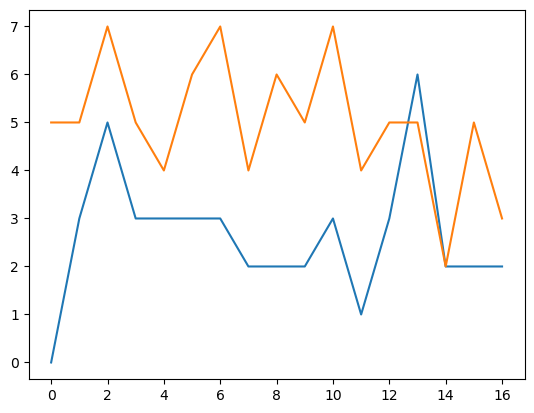

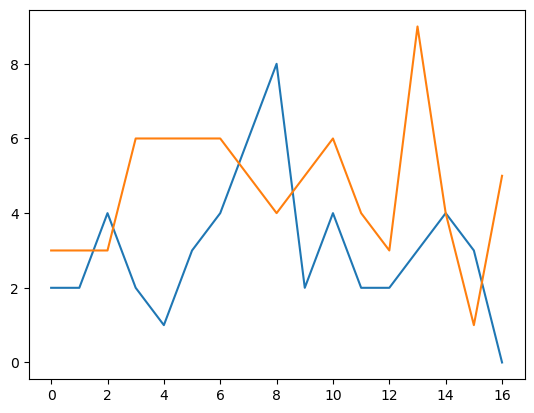

In [ ]:
plt.plot(path_list_dict1['0'])
plt.plot(path_list_dict2['0'])
plt.show()
plt.plot(path_list_dict1['33'])
plt.plot(path_list_dict2['33'])
plt.show()

In [19]:
# 4- for this question I find the number of links between a member of a club with the member of the other clubs
# since it may be a reason that they are not satisfied with their club

# loop over the nodes
prefer_other_club = {}
for node1 in graph.nodes:
    counter = 0

    # loop over the neghbours of the nodes
    for node2 in graph[node1]:
        # if the clubs between these two people are not the same add one to counter
        if graph.nodes[node1]['club'] != graph.nodes[node2]['club']:
            counter += 1

    prefer_other_club[node1] = counter

print(prefer_other_club)

sorted_list = sorted(prefer_other_club.values(), reverse=True)
top_three_nodes = {}

# find three people with most number of visits with other people from the other club
for weight in sorted_list[0:5]:
    for key, value in prefer_other_club.items():
        if value == weight:
            top_three_nodes[key] = value

print(top_three_nodes)
# among these members 33 is a teacher and he/she may want to attract other members attention to the new club. 
# But,2 and 8 are two numinator for changing their clob because they spend much more time with the members with the other group 

{'0': 1, '1': 1, '2': 4, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 3, '9': 1, '10': 0, '11': 0, '12': 0, '13': 1, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 1, '20': 0, '21': 0, '22': 0, '23': 0, '24': 0, '25': 0, '26': 0, '27': 1, '28': 1, '29': 0, '30': 2, '31': 1, '32': 2, '33': 3}
{'2': 4, '8': 3, '33': 3, '30': 2, '32': 2}


## Question 4 (20 pt)

From Wikipedia[[1]]: "a maximum common induced subgraph of two graphs G and H is a graph that is an induced subgraph of both G and H, and that has as many vertices as possible".

Given two simple, undirected graphs $G$ and $H$ one way of finding the maximum common induced subgraph is by first constructing the *modular product graph*[[2]] $M$, and then finding all cliques in $M$. If $G$ has nodes $a, b, c, d, ...$, and H has nodes $1, 2, 3, 4, ...$ then $M$ will have as nodes all possible combinations: $V(M) = (a, 1), (a, 2), ..., (a, |H|), (b, 1), ..., (b, |H|), ..., (|G|, 1), ..., (|G|, |H|)$. $M$ will contain an edge if the edge is either in both graphs, or in neither. In other words:
Edge $((u1, v1), (u2, v2)) \in E(M)$ if either $(u1, u2) \in E(G)$ *and* $(v1, v2) \in E(H)$; or $(u1, u2) \notin E(G)$ *and* $(v1, v2) \notin E(H)$. 

For example, if $(a, b) \in E(G)$ and $(2, 6) \in E(H)$, then $((a, 2), (b, 6)) \in E(M)$. Or, if $(a, c) \notin E(G)$ and $(3, 6) \notin E(H)$ then $((a, 3), (c, 6)) \in E(M)$.

Clique(s) of $M$ will consist of nodes in $M$, which in turn correspond to nodes in $G$ and $H$. For example, if $M$ contains a clique ${(a, 3), (b, 2), (c, 1)}$ it means the induced subgraph ${a, b, c} \subseteq V(G)$ is isomorphic to the induced subgraph ${1, 2, 3} \subseteq V(H)$. It is often convenient to express this as a mapping of nodes between $G$ and $H$. In this example, the Python dictionary `{'a': 3, 'b': 2, 'c': 1}`. 

1. What is an induced subgraph? Also give an example.
2. Explain in your own words what a maximum common induced subgraph is, and give an example.
3. Explain in your own words what a modular product graph is, and give an example.
4. Implement a function to calculate the modular product graph of two given undirected graphs.
5. Implement a function to calculate the maximum common induced subgraph of two given graphs. Be sure to use an existing function to find the largest clique! If the modular product graph contains multiple largest cliques, you may choose which you use. Return the maximum common induced subgraph as a dict, described above.

[1]: https://en.wikipedia.org/wiki/Maximum_common_induced_subgraph
[2]: https://en.wikipedia.org/wiki/Modular_product_of_graphs

In [ ]:
# 1- an induced subgraph is a subset of a graph. Also, graph that formes from a subset of the vertices of the graph and all of the edges 
# (from the original graph) connecting pairs of vertices in that subset. A good example can be when we have  a 4- complete graph
# (a complete graph with 4 nodes) if we seperate 3 nodes of this the induced graph that can be made from these three nodes is another complete
# graph with three nodes. Also, imagine we have a bipartite graph of clubs and members if we choose 2 clubs and all of their members and edges 
# between them we make an induced sub graph. 

# 2- is a kind of induced subgraph that belongs two both graph H and G with the most number of nodes. that means that it is the largest induced 
# subgraph that intersects between two graphs H and G.
# 3- a mudular graph product is a combination of two distinct matrices(graphs) for example H and G. that is used a Cartesian product of the sets of 
# vertices of the two graphs G and H as its vertices, for example (u, v). Also, it is a kind of graph product. also, when regarding its edges, it has
# an edge between two vertices when there is an edge between u1 and u2 from G and v1 and v2 from H or there is no edge between each of these pairs.
# a good example can be G = 2- complete graph (1, 2) and H  = another two complete graph (a, b)
# the modular product graph has 4 vertices [(1,a), (1,b)] .   this graph has just two edges betwwen one: (1,a) and (2,b)
#                                          [(2,a), (2,b)]                                           two: (2,a) and (1,b)


Graph with 9 nodes and 10 edges
[(1, 'a'), (1, 'b'), (1, 'c'), (2, 'a'), (2, 'b'), (2, 'c'), (3, 'a'), (3, 'b'), (3, 'c')]
[[0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0.]]


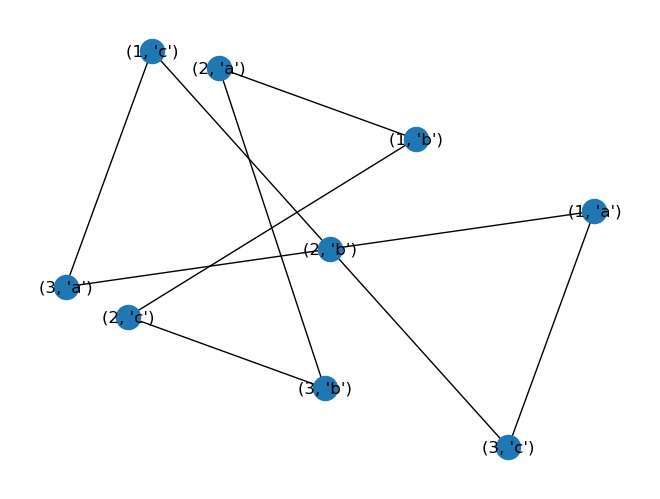

In [ ]:
# 4- in this question there are two ways to make this one of them is using internal function of NetworkX
g = nx.Graph()
h = nx.Graph()

g.add_edges_from([(1, 2),
                  (2, 3)])

h.add_edges_from([('a', 'b'),
                  ('b', 'c')])


def modular_graph(g, h):

    # make the modular graph
    modular_graph = nx.Graph()

    # loop over two graphs to make all the nodes of the modular graph
    for node_g in g.nodes:

        for node_h in h.nodes:
            modular_graph.add_node((node_g, node_h))

    # loop over all the nodes of the first graph twice to use has_edge function
    for node_g1 in g.nodes:
        for node_g2 in g.nodes:
            edge_g = g.has_edge(node_g1, node_g2)

            # loop over all the nodes of the second graph twice to use has_edge function
            for node_h1 in h.nodes:
                for node_h2 in h.nodes:
                    edge_h = h.has_edge(node_h1, node_h2)

                    # if has_edge for both graphs are true or false and we have not add the edge before
                    if edge_g == edge_h and ((node_g1, node_h1), (node_g2, node_h2)) not in modular_graph.edges:

                        # also if it does not make a self_loop add the edge to the new graph
                        if node_g1 != node_g2 and node_h1 != node_h2:
                            modular_graph.add_edge((node_g1, node_h1), (node_g2, node_h2))
    
    return modular_graph


graph = modular_graph(g,h)
print(graph)
print(graph.nodes)
a = nx.to_numpy_array(graph)
print(a)
nx.draw_kamada_kawai(graph, with_labels=True)



In [ ]:
# 5- I will use a premade function for this part because it is quicker and I am runnig my time
cliques = list(nx.find_cliques(graph))
induced_subgraph = {}

# use the first clique to make the dictionary
for node in cliques[0]:
    induced_subgraph[node[0]] = node[1]

print(cliques)
print(f'the maximum common induced subgraph: {induced_subgraph}')

[[(2, 'b'), (3, 'c'), (1, 'a')], [(2, 'b'), (1, 'c'), (3, 'a')], [(2, 'a'), (3, 'b')], [(2, 'a'), (1, 'b')], [(3, 'b'), (2, 'c')], [(2, 'c'), (1, 'b')]]
the maximum common induced subgraph: {2: 'b', 3: 'c', 1: 'a'}


# --- END OF EXAM ---
Congrats, you made it to the end of the exam! Don't forget to rename your ipynb to "GTExam_YOUR_NAME_STUDENTNR.ipynb" and hand it in via BlackBoard submit!